# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [2]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor - cursor object to execute sql
cursor = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [4]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(*) 
    FROM Products
    WHERE price < 10
""")

rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [5]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(Country) AS country_count
    FROM Suppliers
    GROUP BY Country
    ORDER BY country_count DESC
""")

# TODO: Fetch your list of tuples and print it out
country_count = cursor.fetchall()
print(country_count)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


Text(0.5, 1.0, 'Countries by Supplier')

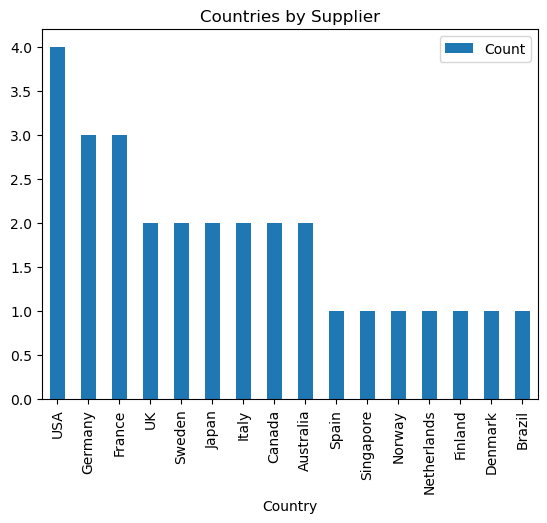

In [6]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(country_count, columns=["Country", "Count"])

# TODO: Generate a visualization on this dataframe
df.plot.bar(x="Country", y="Count")
plt.title("Countries by Supplier")

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [7]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(*) as country_count
    FROM Customers
    GROUP BY Country
    ORDER BY country_count DESC
""" )

# TODO: Fetch your list of tuples and print it out
country_count_customers = cursor.fetchall()
print(country_count_customers)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


Text(0.5, 1.0, 'Countries by Customers')

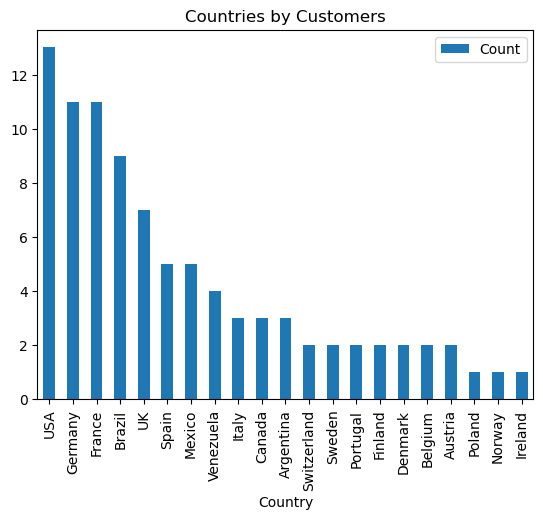

In [8]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(country_count_customers, columns=["Country", "Count"])

# TODO: Generate a visualization on this dataframe
df.plot.bar(x="Country", y="Count")
plt.title("Countries by Customers")

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute("""
    SELECT p.ProductName, SUM(o.quantity) AS total_quantity
    FROM OrderDetails o JOIN Products p
    ON o.productID = p.productID
    GROUP BY p.productID
    ORDER BY total_quantity ASC
    LIMIT 20
    """)

# TODO: Fetch your list of tuples and print it out
products_by_quantity = cursor.fetchall()
print(products_by_quantity)

[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ("Uncle Bob's Organic Dried Pears", 25), ('Genen Shouyu', 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Schoggi Schokolade', 90), ('Louisiana Hot Spiced Okra', 90)]


Text(0.5, 1.0, 'Products by Quantity')

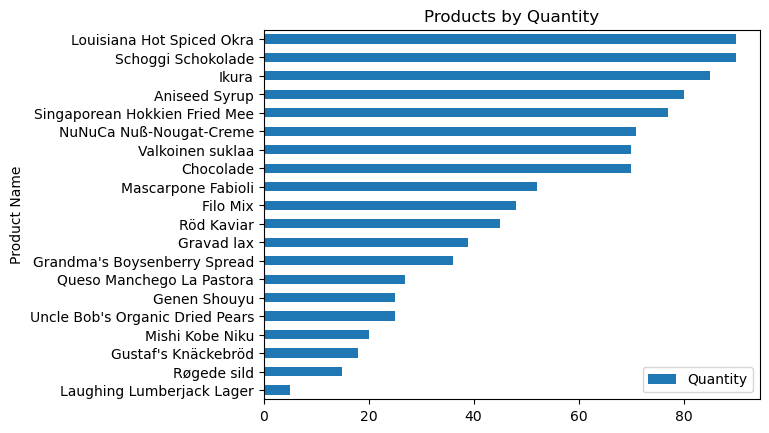

In [40]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(products_by_quantity,columns=["Product Name", "Quantity"])

# TODO: Generate a visualization on this dataframe
df.plot.barh(x="Product Name", y="Quantity")
plt.title("Products by Quantity")

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [51]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT p.ProductName, o.quantity * p.price AS total_revenue
    FROM OrderDetails o JOIN Products p
    ON o.productID = p.productID
    GROUP BY p.productID
    ORDER BY total_revenue ASC
    LIMIT 20
""")

# TODO: Fetch your list of tuples and print it out
products_by_revenue = cursor.fetchall()
print(products_by_revenue)

[('Teatime Chocolate Biscuits', 9.2), ('Gravad lax', 26), ('Scottish Longbreads', 37.5), ('NuNuCa Nuß-Nougat-Creme', 56), ('Konbu', 60), ('Geitost', 62.5), ('Guaraná Fantástica', 67.5), ('Laughing Lumberjack Lager', 70), ('Tourtière', 74.5), ('Gnocchi di nonna Alice', 76), ("Jack's New England Clam Chowder", 96.5), ("Sir Rodney's Scones", 100), ("Gustaf's Knäckebröd", 126), ('Singaporean Hokkien Fried Mee', 140), ('Filo Mix', 140), ('Røgede sild', 142.5), ('Zaanse koeken', 152.0), ('Original Frankfurter grüne Soße', 156), ('Mozzarella di Giovanni', 174.0), ('Spegesild', 180)]


Text(0.5, 1.0, 'Products by Total Revenue')

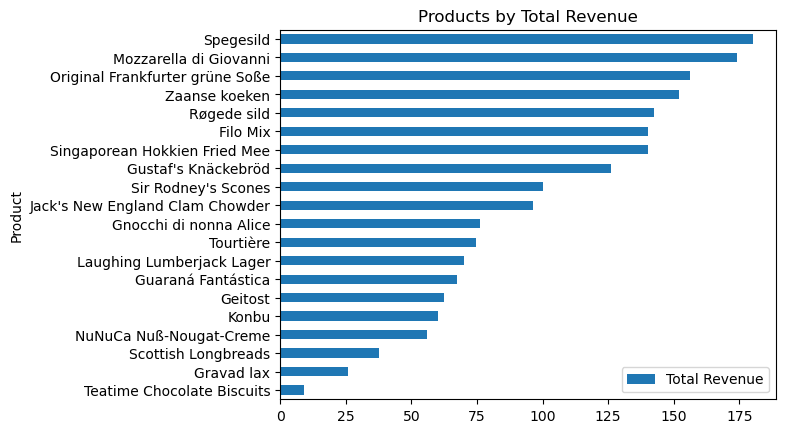

In [52]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(products_by_revenue,columns=["Product", "Total Revenue"])

# TODO: Generate a visualization on this dataframe
df.plot.barh(x="Product", y="Total Revenue")
plt.title("Products by Total Revenue")

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [13]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(*) AS order_count
    FROM Orders o JOIN Customers c
    ON o.CustomerID = c.CustomerID
    GROUP BY Country
    ORDER BY order_count DESC
""")

# TODO: Fetch your list of tuples and print it out
most_orders = cursor.fetchall()
print(most_orders)

[('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1), ('Argentina', 1)]


Text(0.5, 1.0, 'Countries by Orders Placed')

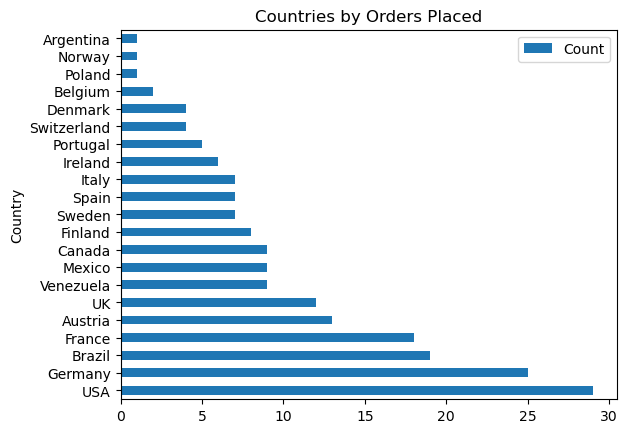

In [14]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(most_orders,columns=["Country", "Count"])

# TODO: Generate a visualization on this dataframe
df.plot.barh(x="Country", y="Count")
plt.title("Countries by Orders Placed")

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [15]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(*) AS no_order_count
    FROM Customers c LEFT JOIN Orders o
    ON c.CustomerID = o.CustomerID
    WHERE o.orderID IS NULL
    GROUP BY Country
    ORDER BY no_order_count
""")

# TODO: Fetch your list of tuples and print it out
no_orders = cursor.fetchall()
print(no_orders)

[('Belgium', 1), ('Canada', 1), ('Spain', 1), ('UK', 1), ('Argentina', 2), ('Germany', 2), ('France', 4), ('USA', 5)]


Text(0.5, 1.0, 'Countries with No Orders Placed')

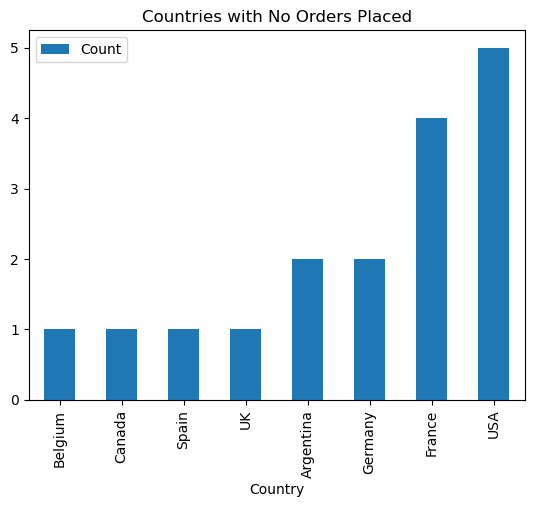

In [16]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(no_orders,columns=["Country", "Count"])

# TODO: Generate a visualization on this dataframe
df.plot.bar(x="Country", y="Count")
plt.title("Countries with No Orders Placed")

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [53]:
# TODO: Write a SQL query which will answer the question above.

# subquery
# cursor.execute("""
#     SELECT SupplierName, supply.supplier_count
#         FROM Suppliers s 
#         JOIN 
#             (SELECT COUNT(p.SupplierID) AS supplier_count, SupplierID
#             FROM OrderDetails o JOIN Products p ON o.ProductID = p.ProductID
#             GROUP BY supplierID
#             ORDER BY supplier_count DESC) supply
#         ON s.SupplierID = supply.SupplierID
#     """)

# 2 joins 
cursor.execute("""
    SELECT s.SupplierName, COUNT(s.SupplierID) as supplier_count
    FROM Suppliers s 
        JOIN Products p 
        ON s.SupplierID = p.SupplierID
        JOIN OrderDetails o ON o.ProductID = p.ProductID
    GROUP BY s.SupplierID
    ORDER BY supplier_count DESC
   
    """)

# TODO: Fetch your list of tuples and print it out
popular_supplier = cursor.fetchall()
print(popular_supplier)

[('Plutzer Lebensmittelgroßmärkte AG', 42), ('Pavlova, Ltd.', 40), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 32), ('Formaggi Fortini s.r.l.', 31), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ("G'day, Mate", 19), ('Karkki Oy', 19), ('Leka Trading', 17), ('New England Seafood Cannery', 17), ("Mayumi's", 17), ('Bigfoot Breweries', 16), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Heli Süßwaren GmbH & Co. KG', 15), ('Svensk Sjöföda AB', 14), ('Tokyo Traders', 12), ('Refrescos Americanas LTDA', 11), ("Cooperativa de Quesos 'Las Cabras'", 11), ('Lyngbysild', 8), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8), ('PB Knäckebröd AB', 6), ("Grandma Kelly's Homestead", 6), ('Escargots Nouveaux', 4), ('Zaanse Snoepfabriek', 4)]


Text(0.5, 1.0, 'Suppliers by Orders Placed')

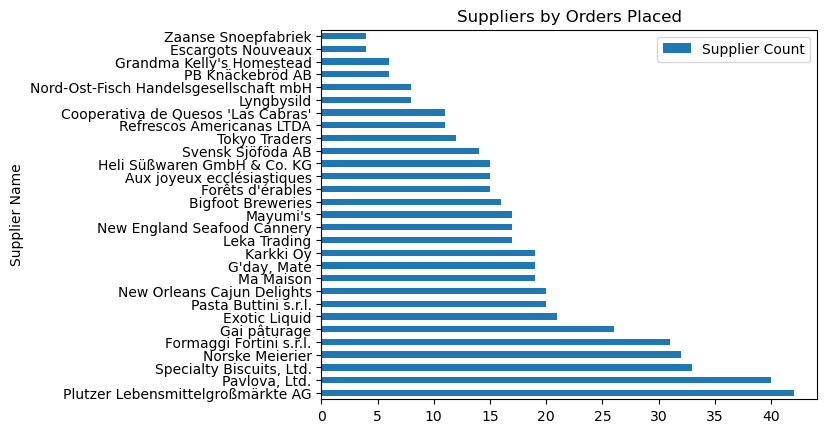

In [46]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(popular_supplier,columns=["Supplier Name", "Supplier Count"])

# TODO: Generate a visualization on this dataframe
df.plot.barh(x="Supplier Name", y="Supplier Count")
plt.title("Suppliers by Orders Placed")

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

The United States, Germany and France has the greatest number of customers at 13, 11, and 11, respectively. There are also more suppliers in the United States, Germany and France at 4, 3 and 3, respectively. This shows that there is some indication that more customers in a country can lead to more suppliers. The USA had the greatest number of customers and suppliers. (13 and 4)

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

The least popular product by order quantity is Laughing Lumberjack Lager and Røgede sild which has a total order quantity 5 and 15 respectively. The least popular product by revenue is Teatime Chocolate Biscuits and Gravad lax at $9.2 and $26 respectively. This shows that the least popular products by quantity does not necessarily lead to less revenue.


### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

The country with the most orders is the USA with 23 orders. The USA also has the most non-ordering customers at 5 customers. This shows that countries with more ordering customers have more non-ordering customers as well. 

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

The supplier with the most orders is Plutzer Lebensmittelgroßmärkte AG with 42 orders. This is determined by joining the OrderDetails, Products, and Suppliers tables, counting the number of rows grouped by supplierID, and sorting that count in descending order.
